In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

In [5]:
def is_chinese(uchar):         
    if u'\u4e00' <= uchar<=u'\u9fff':
        return True
    else:
        return False

In [2]:
data = open("file.txt", "r", encoding="utf-8")
data = data.read()

In [3]:
seg_list = jieba.cut(data, cut_all=False)  # 精确模式
print("Default Mode: " + "/ ".join(seg_list))  

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\chloe\AppData\Local\Temp\jieba.cache
Loading model cost 1.106 seconds.
Prefix dict has been built succesfully.


Default Mode:  / 
/ -/  / 186/  / -/  / 
/ 東/  / 元/  / 電/  / 機/  / 股/  / 份/  / 有/  / 限/  / 公/  / 司/  / 及/  / 子/  / 公/  / 司/  /  / 
/ 合/  /  /  / 併/  /  /  / 財/  /  /  / 務/  /  /  / 報/  /  /  / 表/  /  /  / 附/  /  /  / 註/  /  / 
/ 民/  / 國/  / 106/  / 年/  / 度/  / 及/  / 105/  / 年/  / 度/  /  / 
/ 單/  / 位/  / ：/  / 新/  / 台/  / 幣/  / 仟/  / 元/  /  / 
/ (/ 除/  / 特/  / 別/  / 註/  / 明/  / 者/  / 外/  / )/  / 
/  / 
/ 一/  / 、/  / 公/  / 司/  / 沿/  / 革/  /  / 
/ 東/  / 元/  / 電/  / 機/  / 股/  / 份/  / 有/  / 限/  / 公/  / 司/  / (/ 以/  / 下/  / 簡/  / 稱/  / 「/  / 本/  / 公/  / 司/  / 」/  / )/ 於/  / 中/  / 華/  / 民/  / 國/  / 設/  / 立/  / ，/  / 本/  / 公/  / 司/  / 及/  / 子/  / 公/ 
/ 司/  / (/ 以/  / 下/  / 統/  / 稱/  / 「/  / 本/  / 集/  / 團/  / 」/  / )/ 主/  / 要/  / 經/  / 營/  / 之/  / 業/  / 務/  / 為/  / ：/  / 各/  / 種/  / 機/  / 械/  / 設/  / 備/  / 、/  / 冷/  / 凍/  / 空/  / 調/  / 設/  / 備/  / 、/ 
/ 發/  / 電/  / 、/  / 輸/  / 電/  / 、/  / 配/  / 電/  / 機/  / 械/  / 、/  / 電/  / 器/  / 及/  / 視/  / 聽/  / 電/  / 子/  / 產/  / 品/  / 、/  / 有/  / 線/  / 及/  /

In [6]:
new_data=""
for d in data:
    if is_chinese(d):
        new_data+=d

In [85]:
stopwords = ['我', '對', '\n',"集團","股份","或","資產","有限公司","年度","公司","準則","註","之","及","於","年月日","年","月","日","民國","至","在","係","所","以","馬","可","金","包含","評估","第號","機","未","新","為","已","可能","時","解釋","支付","當現"]
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
word = ["或有負債","不動產廠房及設備","馬達","其他綜合損益","無形資產"]
for w in word:
    jieba.add_word(w, freq=None, tag=None)

In [86]:
seg_list = jieba.cut(new_data, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1

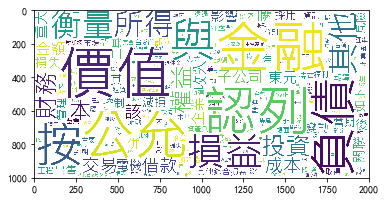

In [87]:
font = "msjh.ttc"
wordcloud = WordCloud(background_color="white",width=2000, height=1000, margin=2,font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)
wordcloud.to_file('test.png')

In [91]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)

In [92]:
ten[:10]

[('價值', 156),
 ('金融', 150),
 ('認列', 136),
 ('公允', 135),
 ('負債', 115),
 ('按', 110),
 ('與', 105),
 ('損益', 105),
 ('衡量', 103),
 ('其他', 103)]

In [93]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])


([<matplotlib.axis.XTick at 0x2bea92686d8>,
 <a list of 10 Text xticklabel objects>)

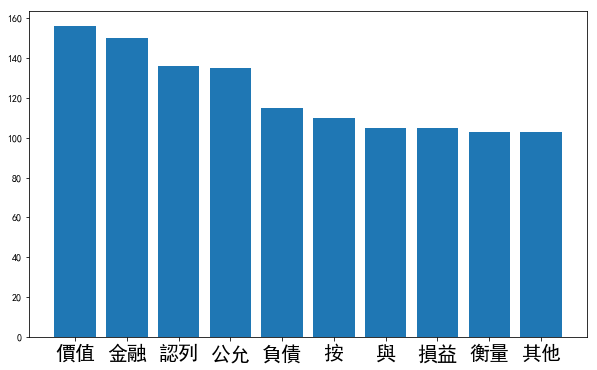

In [95]:
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.figure(figsize=(10,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)